In [1]:
from appyter import magic 
magic.init(lambda _= globals: _())

In [29]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import pandas as pd
import umap
from pycombat import Combat
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
%%appyter hide_code
{% do SectionField(name='section0', 
                   title='Select Species', 
                   subtitle='Select the Species that you would like to view') %}
{% do SectionField(name='section1', 
                   title='Select Gene', 
                   subtitle='Select the Gene that you would like to create a plot for') %}
{% do SectionField(name='section2',
                  title='Model Selection',
                   subtitle='Customize which parts of the model you would like to view'
                  ) %}

In [38]:
%%appyter code_exec

SPECIES_CHOICE = {{ ChoiceField(name = 'SPECIES_CHOICE', label='Species Choice', choices={'Mouse':'1', 'Human':'2'}, default = "Mouse", section='section0')}}
GENE_CHOICE = {{ ChoiceField(name='GENE_CHOICE', label = 'Gene Choice', choices={'0610007P14Rik': '0',
 '0610009B22Rik': '1','0610009L18Rik': '2','0610009O20Rik': '3','0610010F05Rik': '4','0610010K14Rik': '5','0610012G03Rik': '7','0610030E20Rik': '8','0610037L13Rik': '9','1110001J03Rik': '11',
 '1110004E09Rik': '13', '1110004F10Rik': '14','1110008F13Rik': '15','1110008L16Rik': '16','1110008P14Rik': '17','1110012L19Rik': '18',
 '1110017D15Rik': '19','1110032A03Rik': '21','1110032F04Rik': '22','1110034G24Rik': '23','1110037F02Rik': '24','1110038F14Rik': '25','1110051M20Rik': '26',
 '1110059E24Rik': '28','1110059G10Rik': '29','1110065P20Rik': '30','1190002N15Rik': '31','1190003K10Rik': '32','1190005I06Rik': '33',
 '1190007I07Rik': '34','1500009C09Rik': '36','1500009L16Rik': '37','1500011B03Rik': '38','1500011K16Rik': '39', '1500015O10Rik': '40',
 '1520401A03Rik': '41','1600002H07Rik': '42', '1600002K03Rik': '43','1600012H06Rik': '44','1600014C10Rik': '45','1600014C23Rik': '46',
 '1600029O15Rik': '48', '1700001F09Rik': '51','1700001J11Rik': '53','1700001K19Rik': '54','1700001L19Rik': '55','1700001O22Rik': '56',
 '1700001P01Rik': '57','1700003E16Rik': '58','1700003F12Rik': '59', '1700003N22Rik': '61', '1700006E09Rik': '63', '1700007B14Rik': '64',
 '1700007K09Rik': '67', '1700008O03Rik': '69', '1700010B08Rik': '72', '1700010I14Rik': '73', '1700011E24Rik': '75', '1700011I03Rik': '77', '1700011M02Rik': '79',
 '1700012B09Rik': '82', '1700012P22Rik': '84', '1700013F07Rik': '86', '1700014D04Rik': '89', '1700015F17Rik': '91', '1700016C15Rik': '93', '1700016D06Rik': '94', '1700016H13Rik': '95',
 '1700017B05Rik': '97', '1700017N19Rik': '99', '1700018C11Rik': '101', '1700019A02Rik': '104', '1700019B03Rik': '105', '1700019D03Rik': '106', '1700019N19Rik': '108',
 '1700020A23Rik': '110', '1700020D05Rik': '111', '1700020L24Rik': '112', '1700021F05Rik': '115', '1700022I11Rik': '118', '1700023F06Rik': '119', '1700024B05Rik': '120',
 '1700024G13Rik': '121',
 '1700024J04Rik': '122',
 '1700024P16Rik': '124',
 '1700025C18Rik': '126',
 '1700025G04Rik': '128',
 '1700028B04Rik': '129',
 '1700028J19Rik': '130',
 '1700028K03Rik': '131',
 '1700028P14Rik': '132',
 '1700029F12Rik': '133',
 '1700029H14Rik': '134',
 '1700029I15Rik': '135',
 '1700029J07Rik': '136',
 '1700030J22Rik': '139',
 '1700030K09Rik': '140',
 '1700031F05Rik': '141',
 '1700034I23Rik': '144',
 '1700037C18Rik': '147',
 '1700037H04Rik': '148',
 '1700040L02Rik': '151',
 '1700047I17Rik2': '153',
 '1700048O20Rik': '154',
 '1700049G17Rik': '157',
 '1700056E22Rik': '159',
 '1700061G19Rik': '161',
 '1700063K16Rik': '162',
 '1700066M21Rik': '166',
 '1700067K01Rik': '167',
 '1700067P10Rik': '168',
 '1700069L16Rik': '169',
 '1700073E17Rik': '171',
 '1700086L19Rik': '178',
 '1700088E04Rik': '179',
 '1700092M07Rik': '181',
 '1700102P08Rik': '183',
 '1700109H08Rik': '184',
 '1700112E06Rik': '186',
 '1700113H08Rik': '187',
 '1700122O11Rik': '188',
 '1700123K08Rik': '190',
 '1700123L14Rik': '191',
 '1700123O20Rik': '192',
 '1700125H20Rik': '193',
 '1700128F08Rik': '194',
 '1700129C05Rik': '195',
 '1810009A15Rik': '196',
 '1810011O10Rik': '200',
 '1810013L24Rik': '201',
 '1810018F18Rik': '202',
 '1810022K09Rik': '203',
 '1810024B03Rik': '204',
 '1810026J23Rik': '205',
 '1810030O07Rik': '206',
 '1810032O08Rik': '207',
 '1810037I17Rik': '208',
 '1810041L15Rik': '209',
 '1810043G02Rik': '210',
 '1810043H04Rik': '211',
 '1810049J17Rik': '213',
 '1810055G02Rik': '214',
 '1810065E05Rik': '216',
 '2010003K11Rik': '218',
 '2010107E04Rik': '222',
 '2010107G23Rik': '224',
 '2010109A12Rik': '225',
 '2010111I01Rik': '227',
 '2010300C02Rik': '228',
 '2010315B03Rik': '229',
 '2200002D01Rik': '230',
 '2200002J24Rik': '231',
 '2210010C04Rik': '232',
 '2210013O21Rik': '234',
 '2210016L21Rik': '236',
 '2210017I01Rik': '237',
 '2210404O09Rik': '238',
 '2210407C18Rik': '239',
 '2210408I21Rik': '240',
 '2300009A05Rik': '245',
 '2310007B03Rik': '248',
 '2310009B15Rik': '249',
 '2310011J03Rik': '250',
 '2310022A10Rik': '251',
 '2310022B05Rik': '252',
 '2310030G06Rik': '253',
 '2310033P09Rik': '254',
 '2310035C23Rik': '257',
 '2310036O22Rik': '258',
 '2310057M21Rik': '263',
 '2310061I04Rik': '265',
 '2310079G19Rik': '267',
 '2410002F23Rik': '268',
 '2410004B18Rik': '269',
 '2410004P03Rik': '270',
 '2410015M20Rik': '271',
 '2410016O06Rik': '272',
 '2410024N13Rik': '273',
 '2410089E03Rik': '274',
 '2410131K14Rik': '275',
 '2410137M14Rik': '276',
 '2410141K09Rik': '277',
 '2510002D24Rik': '278',
 '2510009E07Rik': '279',
 '2510039O18Rik': '280',
 '2610001J05Rik': '281',
 '2610002M06Rik': '282',
 '2610005L07Rik': '283',
 '2610008E11Rik': '284',
 '2610021A01Rik': '286',
 '2610042L04Rik': '289',
 '2610044O15Rik8': '290',
 '2610301B20Rik': '291',
 '2610318N02Rik': '293',
 '2610507B11Rik': '294',
 '2610524H06Rik': '295',
 '2610528J11Rik': '297',
 '2700029M09Rik': '298',
 '2700049A03Rik': '299',
 '2700060E02Rik': '300',
 '2700062C07Rik': '301',
 '2700081O15Rik': '302',
 '2700094K13Rik': '303',
 '2700097O09Rik': '304',
 '2700099C18Rik': '305',
 '2810004N23Rik': '306',
 '2810006K23Rik': '307',
 '2810021J22Rik': '308',
 '2810039B14Rik': '310',
 '2810047C21Rik1': '311',
 '2810403A07Rik': '312',
 '2810428I15Rik': '315',
 '2900011O08Rik': '318',
 '2900055J20Rik': '320',
 '3000002C10Rik': '322',
 '3010026O09Rik': '323',
 '3110001I22Rik': '325',
 '3110002H16Rik': '326',
 '3110009E18Rik': '327',
 '3110021N24Rik': '329',
 '3110040N11Rik': '331',
 '3110043O21Rik': '332',
 '3110052M02Rik': '333',
 '3110053B16Rik': '334',
 '3110067C02Rik': '336',
 '3110070M22Rik': '337',
 '3110079O15Rik': '338',
 '3110082I17Rik': '339',
 '3110082J24Rik': '340',
 '3300002I08Rik': '341',
 '3425401B19Rik': '342',
 '3632451O06Rik': '343',
 '3830406C13Rik': '345',
 '3830408C21Rik': '346',
 '4833420G17Rik': '350',
 '4833423E24Rik': '351',
 '4833427G06Rik': '352',
 '4833439L19Rik': '353',
 '4921507P07Rik': '356',
 '4921508M14Rik': '357',
 '4921517D22Rik': '364',
 '4921524J17Rik': '365',
 '4921528I07Rik': '367',
 '4921530L21Rik': '368',
 '4930402H24Rik': '373',
 '4930404N11Rik': '376',
 '4930408O17Rik': '378',
 '4930415F15Rik': '380',
 '4930415L06Rik': '382',
 '4930426L09Rik': '385',
 '4930427A07Rik': '386',
 '4930430A15Rik': '387',
 '4930430F08Rik': '388',
 '4930431P19Rik': '389',
 '4930432K21Rik': '391',
 '4930444P10Rik': '398',
 '4930447A16Rik': '399',
 '4930447C04Rik': '400',
 '4930451G09Rik': '405',
 '4930452B06Rik': '407',
 '4930453N24Rik': '408',
 '4930465K10Rik': '410',
 '4930467E23Rik': '411',
 '4930470P17Rik': '413',
 '4930474N05Rik': '414',
 '4930502E18Rik': '418',
 '4930503B20Rik': '419',
 '4930503L19Rik': '422',
 '4930507D05Rik': '425',
 '4930518I15Rik': '431',
 '4930519F16Rik': '433',
 '4930519P11Rik': '435',
 '4930522L14Rik': '437',
 '4930523C07Rik': '438',
 '4930524B15Rik': '439',
 '4930524J08Rik': '440',
 '4930533O14Rik': '445',
 '4930535I16Rik': '446',
 '4930538K18Rik': '447',
 '4930539E08Rik': '448',
 '4930544D05Rik': '449',
 '4930556J24Rik': '459',
 '4930558C23Rik': '461',
 '4930562C15Rik': '463',
 '4930578C19Rik': '471',
 '4930578G10Rik': '472',
 '4930578I06Rik': '473',
 '4930579G24Rik': '475',
 '4930590J08Rik': '477',
 '4930595D18Rik': '478',
 '4931406B18Rik': '482',
 '4931406P16Rik': '484',
 '4931414P19Rik': '487',
 '4931422A03Rik': '489',
 '4931423N10Rik': '490',
 '4931428F04Rik': '491',
 '4931428L18Rik': '492',
 '4931429L15Rik': '493',
 '4931431F19Rik': '494',
 '4931440P22Rik': '496',
 '4932411E22Rik': '497',
 '4932411N23Rik': '498',
 '4932414N04Rik': '499',
 '4932416K20Rik': '501',
 '4932431P20Rik': '503',
 '4932438A13Rik': '504',
 '4932438H23Rik': '505',
 '4932443I19Rik': '506',
 '4933400A11Rik': '507',
 '4933402D24Rik': '509',
 '4933402J07Rik': '511',
 '4933402P03Rik': '514',
 '4933403O08Rik': '515',
 '4933405L10Rik': '516',
 '4933405O20Rik': '517',
 '4933406P04Rik': '520',
 '4933407L21Rik': '521',
 '4933408B17Rik': '522',
 '4933408J17Rik': '523',
 '4933413G19Rik': '529',
 '4933415A04Rik': '531',
 '4933416E14Rik': '534',
 '4933416I08Rik': '535',
 '4933424G06Rik': '539',
 '4933427D14Rik': '541',
 '4933427G23Rik': '543',
 '4933427I04Rik': '544',
 '4933428G20Rik': '545',
 '4933428M09Rik': '546',
 '4933430I17Rik': '547',
 '4933434E20Rik': '548',
 '5031414D18Rik': '551',
 '5031439G07Rik': '552',
 '5033404E19Rik': '553',
 '5033423K11Rik': '554',
 '5330417H12Rik': '556',
 '5330438D12Rik': '557',
 '5430402E10Rik': '559',
 '5430403G16Rik': '560',
 '5430419D17Rik': '562',
 '5730409E04Rik': '566',
 '5730455P16Rik': '568',
 '5730480H06Rik': '569',
 '5730508B09Rik': '571',
 '5730522E02Rik': '572',
 '5830417I10Rik': '576',
 '5830454E08Rik': '577',
 '6030419C18Rik': '580',
 '6030445D17Rik': '581',
 '6030458C11Rik': '583',
 '6030468B19Rik': '584',
 '6030469F06Rik': '585',
 '6330403A02Rik': '587',
 '6330408A02Rik': '588',
 '6330409D20Rik': '589',
 '6330416G13Rik': '590',
 '6330549D23Rik': '591',
 '6430531B16Rik': '592',
 '6430548M08Rik': '593',
 '6430571L13Rik': '595',
 '6430573F11Rik': '596',
 '6430628N08Rik': '597',
 '6720489N17Rik': '598',
 '6820408C15Rik': '599',
 '6820431F20Rik': '600',
 '7420461P10Rik': '602',
 '7530416G11Rik': '603',
 '7530428D23Rik': '604',
 '8030411F24Rik': '605',
 '8030423J24Rik': '606',
 '8030462N17Rik': '607',
 '8030474K03Rik': '608',
 '9030612E09Rik': '610',
 '9030619P08Rik': '612',
 '9030624G23Rik': '613',
 '9030624J02Rik': '614',
 '9130011E15Rik': '616',
 '9130019O22Rik': '617',
 '9130023H24Rik': '618',
 '9130213A22Rik': '621',
 '9130401M01Rik': '623',
 '9230104M06Rik': '629',
 '9230110C19Rik': '632',
 '9230112D13Rik': '634',
 '9230113P08Rik': '635',
 '9330132A10Rik': '636',
 '9330151L19Rik': '637',
 '9330159F19Rik': '638',
 '9330161L09Rik': '639',
 '9330182L06Rik': '640',
 '9430015G10Rik': '643',
 '9430016H08Rik': '644',
 '9430020K01Rik': '645',
 '9430025C20Rik': '646',
 '9430097D07Rik': '650',
 '9530003J23Rik': '652',
 '9530053A07Rik': '653',
 '9530068E07Rik': '654',
 '9530077C05Rik': '655',
 '9630041A04Rik': '656',
 '9830147E19Rik': '658',
 '9930012K11Rik': '659',
 '9930021J03Rik': '660',
 '9930111J21Rik1': '662',
 '9930111J21Rik2': '663',
 'A130006I12Rik': '664',
 'A130010J15Rik': '665',
 'A130057D12Rik': '667',
 'A1bg': '668',
 'A230046K03Rik': '670',
 'A230050P20Rik': '671',
 'A230052G05Rik': '672',
 'A230065H16Rik': '673',
 'A2m': '676',
 'A330017A19Rik': '677',
 'A330044P14Rik': '678',
 'A330070K13Rik': '679',
 'A3galt2': '680',
 'A430005L14Rik': '681',
 'A430033K04Rik': '682',
 'A430078G23Rik': '684',
 'A430105I19Rik': '686',
 'A4gnt': '688',
 'A530064D06Rik': '691',
 'A530099J19Rik': '693',
 'A630001G21Rik': '694',
 'A630010A05Rik': '695',
 'A630033H20Rik': '697',
 'A630095E13Rik': '700',
 'A630095N17Rik': '701',
 'A730015C16Rik': '702',
 'A730018C14Rik': '704',
 'A730061H03Rik': '707',
 'A730071L15Rik': '708',
 'A830005F24Rik': '709',
 'A830010M20Rik': '710',
 'A830018L16Rik': '711',
 'A830031A19Rik': '712',
 'A830080D01Rik': '713',
 'A930003A15Rik': '715',
 'A930004D18Rik': '716',
 'A930009A15Rik': '717',
 'A930011G23Rik': '718',
 'A930017K11Rik': '719',
 'A930017M01Rik': '720',
 'A930018M24Rik': '721',
 'A930035D04Rik': '724',
 'AA413626': '725',
 'AA414768': '726',
 'AA415398': '727',
 'AC109138.1': '739',
 'AC125149.5': '749',
 'AC126035.1': '753',
 'AC132444.3': '756',
 'AC132444.6': '759',
 'AC133103.7': '768',
 'AC139131.1': '769',
 'AC149090.1': '775',
 'AC152063.15': '776',
 'AC163611.2': '779',
 'AC164883.1': '783',
 'AC164883.2': '784',
 'AC165294.2': '786',
 'AC168977.1': '788',
 'AC182748.2': '790',
 'AC182748.3': '791',
 'AC234645.1': '794',
 'AC244694.1': '796',
 'AF529169': '801',
 'AI314180': '803',
 'AI413582': '804',
 'AI429214': '805',
 'AI464131': '806',
 'AI467606': '807',
 'AI593442': '809',
 'AI597479': '810',
 'AI606181': '811',
 'AI661453': '813',
 'AI837181': '814',
 'AI846148': '815',
 'AI854703': '816',
 'AI987944': '817',
 'AK010878': '818',
 'AK157302': '819',
 'AU018091': '823',
 'AU019823': '824',
 'AU022133': '826',
 'AU022252': '827',
 'AU022751': '828',
 'AU040320': '829',
 'AU041133': '830',
 'AV320801': '831',
 'AW011738': '832',
 'AW146154': '833',
 'AW209491': '834',
 'AW549877': '835',
 'AW551984': '836',
 'AW554918': '837',
 'AY074887': '840',
 'Aaas': '844',
 'Aacs': '845',
 'Aadac': '846',
 'Aaed1': '850',
 'Aagab': '851',
 'Aak1': '852',
 'Aamdc': '853',
 'Aamp': '854',
 'Aanat': '855',
 'Aar2': '856',
 'Aars': '858',
 'Aars2': '859',
 'Aarsd1': '860',
 'Aasdh': '861',
 'Aasdhppt': '862',
 'Aatf': '864',
 'Aatk': '865',
 'Abat': '866',
 'Abca1': '867',
 'Abca13': '869',
 'Abca14': '870',
 'Abca16': '872',
 'Abca17': '873',
 'Abca2': '874',
 'Abca3': '875',
 'Abca4': '876',
 'Abca5': '877',
 'Abca7': '879',
 'Abca8b': '881',
 'Abcb10': '883',
 'Abcb1a': '885',
 'Abcb1b': '886',
 'Abcb7': '890',
 'Abcb8': '891',
 'Abcb9': '892',
 'Abcc1': '893',
 'Abcc10': '894',
 'Abcc12': '895',
 'Abcc3': '897',
 'Abcc4': '898',
 'Abcc5': '899',
 'Abcc8': '901',
 'Abcd1': '903',
 'Abcd2': '904',
 'Abcd4': '906',
 'Abce1': '907',
 'Abcf1': '908',
 'Abcf2': '909',
 'Abcf3': '910',
 'Abcg1': '911',
 'Abcg4': '914',
 'Abhd10': '917',
 'Abhd11': '918',
 'Abhd12': '919',
 'Abhd12b': '920',
 'Abhd13': '921',
 'Abhd14a': '922',
 'Abhd16a': '925',
 'Abhd17a': '927',
 'Abhd17b': '928',
 'Abhd17c': '929',
 'Abhd18': '930',
 'Abhd2': '931',
 'Abhd3': '932',
 'Abhd4': '933',
 'Abhd6': '935',
 'Abhd8': '936',
 'Abi1': '937',
 'Abi2': '938',
 'Abi3': '939',
 'Abl1': '941',
 'Abl2': '942',
 'Ablim1': '943',
 'Ablim2': '944',
 'Ablim3': '945',
 'Abr': '947',
 'Abt1': '950',
 'Abtb1': '951',
 'Abtb2': '952',
 'Acaa1b': '954',
 'Acaa2': '955',
 'Acaca': '956',
 'Acad9': '962',
 'Acadsb': '966',
 'Acan': '968',
 'Acap2': '970',
 'Acap3': '971',
 'Acat2': '973',
 'Acbd3': '975',
 'Acbd4': '976',
 'Acbd5': '977',
 'Acbd6': '978',
 'Accs': '980',
 'Accsl': '981',
 'Acd': '982',
 'Acer3': '988',
 'Ache': '989',
 'Acin1': '990',
 'Ackr1': '991',
 'Ackr4': '994',
 'Acly': '995',
 'Acnat1': '997',
 'Acnat2': '998',
 'Aco2': '1000',
 'Acot10': '1003',
 'Acot11': '1004',
 'Acot13': '1006',
 'Acot4': '1009',
 'Acot6': '1011',
 'Acot7': '1012',
 'Acot8': '1013',
 'Acot9': '1014',
 'Acox3': '1017',
 'Acoxl': '1018',
 'Acp1': '1019',
 'Acp2': '1020',
 'Acp7': '1023',
 'Acr': '1026',
 'Acrbp': '1027',
 'Acrv1': '1028',
 'Acsbg1': '1029',
 'Acsbg2': '1030',
 'Acsf2': '1031',
 'Acsf3': '1032',
 'Acsl3': '1034',
 'Acsl4': '1035',
 'Acsl6': '1037',
 'Acsm1': '1038',
 'Acsm2': '1039',
 'Acsm3': '1040',
 'Acss1': '1043',
 'Acss2': '1044',
 'Actb': '1048',
 'Actbl2': '1049',
 'Actg-ps1': '1051',
 'Actg1': '1052',
 'Actl10': '1054',
 'Actl6a': '1056',
 'Actl6b': '1057',
 'Actl9': '1060',
 'Actn1': '1061',
 'Actn2': '1062',
 'Actn3': '1063',
 'Actn4': '1064',
 'Actr10': '1065',
 'Actr1a': '1066',
 'Actr1b': '1067',
 'Actr2': '1068',
 'Actr3': '1069',
 'Actr3b': '1070',
 'Actr5': '1071',
 'Actr6': '1072',
 'Actr8': '1073',
 'Actrt3': '1076',
 'Acvr1': '1077',
 'Acvr1b': '1078',
 'Acvr1c': '1079',
 'Acvr2a': '1080',
 'Acvr2b': '1081',
 'Acvrl1': '1082',
 'Acy1': '1083',
 'Acyp1': '1085',
 'Acyp2': '1086',
 'Adad2': '1089',
 'Adal': '1090',
 'Adam10': '1091',
 'Adam11': '1092',
 'Adam12': '1093',
 'Adam15': '1094',
 'Adam17': '1095',
 'Adam19': '1097',
 'Adam1a': '1098',
 'Adam1b': '1099',
 'Adam21': '1102',
 'Adam22': '1103',
 'Adam23': '1104',
 'Adam32': '1113',
 'Adam5': '1118',
 'Adam9': '1123',
 'Adamdec1': '1124',
 'Adamts10': '1126',
 'Adamts16': '1131',
 'Adamts17': '1132',
 'Adamts18': '1133',
 'Adamts20': '1136',
 'Adamts3': '1137',
 'Adamts4': '1138',
 'Adamts6': '1140',
 'Adamts8': '1142',
 'Adamtsl4': '1147',
 'Adap1': '1149',
 'Adar': '1151',
 'Adarb1': '1152',
 'Adarb2': '1153',
 'Adat1': '1154',
 'Adat2': '1155',
 'Adat3': '1156',
 'Adck1': '1157',
 'Adck2': '1158',
 'Adck3': '1159',
 'Adck4': '1160',
 'Adck5': '1161',
 'Adcy1': '1162',
 'Adcy10': '1163',
 'Adcy2': '1164',
 'Adcy3': '1165',
 'Adcy5': '1167',
 'Adcy6': '1168',
 'Adcy7': '1169',
 'Adcy8': '1170',
 'Adcy9': '1171',
 'Adcyap1': '1172',
 'Adcyap1r1': '1173',
 'Add1': '1174',
 'Add2': '1175',
 'Add3': '1176',
 'Adgra1': '1178',
 'Adgra2': '1179',
 'Adgrb1': '1181',
 'Adgrb2': '1182',
 'Adgrb3': '1183',
 'Adgre5': '1188',
 'Adgrf2': '1190',
 'Adgrf3': '1191',
 'Adgrf4': '1192',
 'Adgrg1': '1194',
 'Adgrg5': '1198',
 'Adgrg6': '1199',
 'Adgrl1': '1201',
 'Adgrl2': '1202',
 'Adgrl3': '1203',
 'Adgrv1': '1205',
 'Adh1': '1206',
 'Adh4': '1207',
 'Adh6-ps1': '1209',
 'Adh6a': '1210',
 'Adh6b': '1211',
 'Adi1': '1214',
 'Adig': '1215',
 'Adipor1': '1217',
 'Adnp': '1222',
 'Adnp2': '1223',
 'Ado': '1224',
 'Adora1': '1225',
 'Adora2a': '1226',
 'Adora2b': '1227',
 'Adora3': '1228',
 'Adpgk': '1229',
 'Adprh': '1230',
 'Adprhl1': '1231',
 'Adprhl2': '1232',
 'Adprm': '1233',
 'Adra1b': '1235',
 'Adra1d': '1236',
 'Adra2a': '1237',
 'Adra2c': '1239',
 'Adrb2': '1241',
 'Adrbk1': '1243',
 'Adrbk2': '1244',
 'Adrm1': '1245',
 'Adsl': '1246',
 'Adss': '1247',
 'Adssl1': '1248',
 'Adtrp': '1249',
 'Aebp2': '1251',
 'Aen': '1252',
 'Aes': '1253',
 'Afap1': '1254',
 'Aff1': '1257',
 'Aff2': '1258',
 'Aff3': '1259',
 'Aff4': '1260',
 'Afg3l1': '1261',
 'Afg3l2': '1262',
 'Afm': '1263',
 'Afmid': '1264',
 'Aftph': '1266',
 'Agap1': '1268',
 'Agap2': '1269',
 'Agap3': '1270',
 'Agbl1': '1271',
 'Agbl2': '1272',
 'Agbl3': '1273',
 'Agbl4': '1274',
 'Agbl5': '1275',
 'Ager': '1276',
 'Agfg1': '1277',
 'Agfg2': '1278',
 'Aggf1': '1279',
 'Agk': '1280',
 'Agl': '1281',
 'Ago1': '1284',
 'Ago2': '1285',
 'Ago3': '1286',
 'Ago4': '1287',
 'Agpat1': '1288',
 'Agpat2': '1289',
 'Agpat3': '1290',
 'Agpat4': '1291',
 'Agpat5': '1292',
 'Agpat9': '1293',
 'Agps': '1294',
 'Agr2': '1295',
 'Agrn': '1297',
 'Agrp': '1298',
 'Agtpbp1': '1300',
 'Agtr1b': '1302',
 'Agtr2': '1303',
 'Agtrap': '1304',
 'Agxt': '1305',
 'Agxt2': '1306',
 'Ahctf1': '1307',
 'Ahcyl1': '1309',
 'Ahcyl2': '1310',
 'Ahdc1': '1311',
 'Ahi1': '1312',
 'Ahrr': '1316',
 'Ahsa1': '1317',
 'Ahsa2': '1318',
 'Ahsg': '1319',
 'Aicda': '1320',
 'Aida': '1321',
 'Aif1l': '1323',
 'Aifm3': '1326',
 'Aig1': '1327',
 'Aimp1': '1331',
 'Aimp2': '1332',
 'Aip': '1333',
 'Aipl1': '1334',
 'Ajap1': '1336',
 'Ak1': '1338',
 'Ak3': '1340',
 'Ak4': '1342',
 'Ak5': '1343',
 'Ak6': '1344',
 'Ak7': '1345',
 'Ak8': '1346',
 'Ak9': '1347',
 'Akain1': '1348',
 'Akap1': '1349',
 'Akap10': '1350',
 'Akap11': '1351',
 'Akap12': '1352',
 'Akap13': '1353',
 'Akap14': '1354',
 'Akap17b': '1355',
 'Akap2': '1356',
 'Akap3': '1357',
 'Akap5': '1359',
 'Akap6': '1360',
 'Akap7': '1361',
 'Akap8': '1362',
 'Akap8l': '1363',
 'Akap9': '1364',
 'Akirin1': '1366',
 'Akirin2': '1368',
 'Akna': '1369',
 'Akp-ps1': '1371',
 'Akp3': '1372',
 'Akr1a1': '1373',
 'Akr1b10': '1374',
 'Akr1b3': '1375',
 'Akr1b7': '1376',
 'Akr1b8': '1377',
 'Akr1c12': '1378',
 'Akr1c13': '1379',
 'Akr1c14': '1380',
 'Akr1c19': '1382',
 'Akr1c20': '1383',
 'Akr1cl': '1386',
 'Akr1e1': '1388',
 'Akt1': '1390',
 'Akt1s1': '1391',
 'Akt2': '1392',
 'Akt2-ps': '1393',
 'Akt3': '1394',
 'Aktip': '1395',
 'Alb': '1399',
 'Alcam': '1400',
 'Aldh18a1': '1402',
 'Aldh1a2': '1404',
 'Aldh1a7': '1406',
 'Aldh1l2': '1409',
 'Aldh5a1': '1417',
 'Aldh7a1': '1419',
 'Aldoa': '1422',
 'Aldoart2': '1424',
 'Aldoc': '1426',
 'Alg1': '1427',
 'Alg10b': '1428',
 'Alg11': '1429',
 'Alg12': '1430',
 'Alg13': '1431',
 'Alg14': '1432',
 'Alg2': '1433',
 'Alg3': '1434',
 'Alg6': '1436',
 'Alg8': '1437',
 'Alg9': '1438',
 'Alk': '1439',
 'Alkbh1': '1440',
 'Alkbh2': '1441',
 'Alkbh3': '1442',
 'Alkbh4': '1443',
 'Alkbh5': '1444',
 'Alkbh6': '1445',
 'Alkbh7': '1446',
 'Alkbh8': '1447',
 'Allc': '1448',
 'Alms1': '1449',
 'Alms1-ps1': '1450',
 'Alox12b': '1453',
 'Alox8': '1458',
 'Aloxe3': '1459',
 'Alpk1': '1461',
 'Alpk2': '1462',
 'Alpk3': '1463',
 'Alpl': '1464',
 'Alppl2': '1465',
 'Als2': '1466',
 'Als2cl': '1467',
 'Alx3': '1472',
 'Alx4': '1473',
 'Alyref': '1474',
 'Alyref2': '1475',
 'Ambn': '1477',
 'Ambp': '1478',
 'Ambra1': '1479',
 'Amd-ps3': '1481',
 'Amd-ps4': '1482',
 'Amd1': '1484',
 'Amd2': '1485',
 'Amdhd2': '1487',
 'Amer1': '1489',
 'Amer2': '1490',
 'Amer3': '1491',
 'Amfr': '1492',
 'Amh': '1493',
 'Amhr2': '1494',
 'Amigo1': '1496',
 'Amigo2': '1497',
 'Amigo3': '1498',
 'Ammecr1': '1499',
 'Ammecr1l': '1500',
 'Amn': '1501',
 'Amn1': '1502',
 'Amot': '1503',
 'Amotl1': '1504',
 'Ampd1': '1506',
 'Ampd2': '1507',
 'Ampd3': '1508',
 'Amph': '1509',
 'Amtn': '1511',
 'Amy2a1': '1514',
 'Amy2a2': '1515',
 'Amy2a3': '1516',
 'Amy2a4': '1517',
 'Amy2a5': '1518',
 'Amz1': '1520',
 'Amz2': '1521',
 'Anapc1': '1522',
 'Anapc10': '1523',
 'Anapc11': '1524',
 'Anapc13': '1525',
 'Anapc15': '1526',
 'Anapc15-ps': '1527',
 'Anapc16': '1528',
 'Anapc2': '1529',
 'Anapc4': '1530',
 'Anapc5': '1531',
 'Anapc7': '1532',
 'Ang': '1533',
 'Ang-ps1': '1534',
 'Ang-ps2': '1535',
 'Ang4': '1538',
 'Angel1': '1541',
 'Angel2': '1542',
 'Angptl3': '1548',
 'Angptl4': '1549',
 'Angptl6': '1550',
 'Angptl8': '1552',
 'Ank': '1553',
 'Ank1': '1554',
 'Ank2': '1555',
 'Ank3': '1556',
 'Ankdd1a': '1558',
 'Ankdd1b': '1559',
 'Ankef1': '1560',
 'Ankfy1': '1561',
 'Ankhd1': '1562',
 'Ankib1': '1563',
 'Ankk1': '1564',
 'Ankle2': '1566',
 'Ankmy1': '1567',
 'Ankmy2': '1568',
 'Ankra2': '1569',
 'Ankrd1': '1570',
 'Ankrd10': '1571',
 'Ankrd11': '1572',
 'Ankrd12': '1573',
 'Ankrd13a': '1574',
},default='Ank', section='section1')}}

SPLINE_DEGREE = {{ 
    IntField(name='SPLINE_DEGREE',
             label='Choose Spline Degree',
             default= 2,
             min=0,
             max=5,
             section='section2'
    
            )}}



```python
SPECIES_CHOICE = 1
GENE_CHOICE = 1553
SPLINE_DEGREE = 2
```

In [15]:
if SPECIES_CHOICE == 1:
    AWS_URL = 'http://appyters.maayanlab.cloud/storage/Age_Expression_Appyter/mouseagedataframe.csv'
    AGE_DF = pd.read_csv(AWS_URL)
    if 'Unnamed: 0' in AGE_DF.columns:
        AGE_DF = AGE_DF.drop('Unnamed: 0', axis = 1)
AGE_DF

,0,1,2,3,4,5,6,7,8,9,...,32535,32536,32537,32538,32539,32540,32541,32542,32543,age
0,2888,821,11,1855,446,389,5540,1152,1846,766,...,426874,406779,206507,257069,8643,276389,33964,207686,67645,38.0
1,326,237,15,558,948,348,176,494,2268,963,...,166457,67231,66546,43705,10887,68987,8146,52952,17932,22.0
2,785,631,48,2953,838,1604,741,809,2384,2497,...,184283,146689,105812,75032,16370,126149,17116,83797,25463,22.0
3,27,41,34,293,256,27,33,134,130,161,...,109902,45754,49335,45978,1879,57024,11139,31842,12539,22.0
4,620,460,36,2554,622,1691,414,661,2012,2126,...,97139,78078,50646,35025,8226,60702,8038,37361,11734,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,612,263,85,969,1172,370,437,506,1020,1114,...,34940,22687,20600,5903,2983,9896,882,4856,1137,12.0
1330,551,289,70,1106,1272,394,400,568,1036,1020,...,36482,24289,21047,5815,2865,10264,842,5400,1399,12.0
1331,568,188,47,947,1387,257,290,429,1044,832,...,27139,17992,16702,3635,1884,7743,595,4177,877,12.0
1332,325,77,18,380,524,170,145,295,814,423,...,19316,13537,10951,5540,1035,7503,1033,7049,2524,12.0


In [16]:
MEAN_DF = AGE_DF.groupby('age').mean().reset_index()

## Age-Expression Curve

In [39]:
#%% appyter code_exec
data_x = MEAN_DF['age']
data_y = MEAN_DF[str(GENE_CHOICE)]


train_x, valid_x, train_y, valid_y = train_test_split(data_x,data_y,test_size=0.33)
weights = np.polyfit(train_x,train_y,SPLINE_DEGREE)
model = np.poly1d(weights)
xp = np.linspace(valid_x.min(),valid_x.max())
pred = model(valid_x)
pred_plot = model(xp)

rolling_mean = MEAN_DF.rolling(window=3).mean()

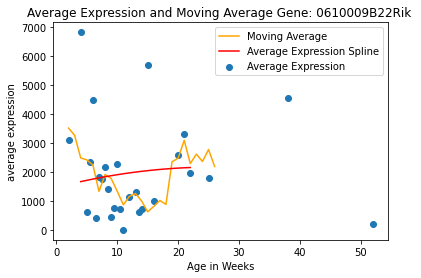

In [40]:
#%%appyter code_exec
plt.scatter(MEAN_DF['age'], MEAN_DF[str(GENE_CHOICE)])
rolling_mean[str(GENE_CHOICE)].plot(legend=True,color='orange' )
plt.plot(xp,pred_plot, color = 'red')
plt.xlabel('Age in Weeks')
plt.ylabel('average expression')
plt.title('Average Expression and Moving Average Gene: 0610009B22Rik ')
label = ['Moving Average', 'Average Expression Spline', 'Average Expression']
plt.legend(label)
plt.show()

## PCA for the Dataset

In [19]:
PCA_DF = AGE_DF.drop('age', axis = 1)

In [20]:
data = PCA_DF.to_numpy()
for x in range(len(data)):
    for y in range(len(data[x])):
        data[x][y] = np.log2(data[x][y] + 1)


In [21]:
trans1 = pd.DataFrame(data)

pca = PCA(n_components = 2)
qt = QuantileTransformer(output_distribution='normal')

Text(0, 0.5, 'Second Principal Component')

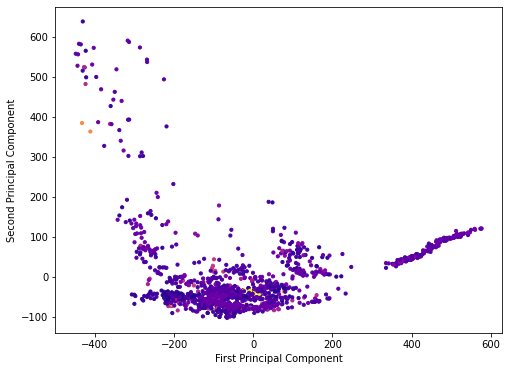

In [22]:
data_trans = qt.fit_transform(trans1)
pca.fit(data_trans)
x_pca = pca.transform(data_trans)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1],c=AGE_DF['age'], cmap = 'plasma', s = 10)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

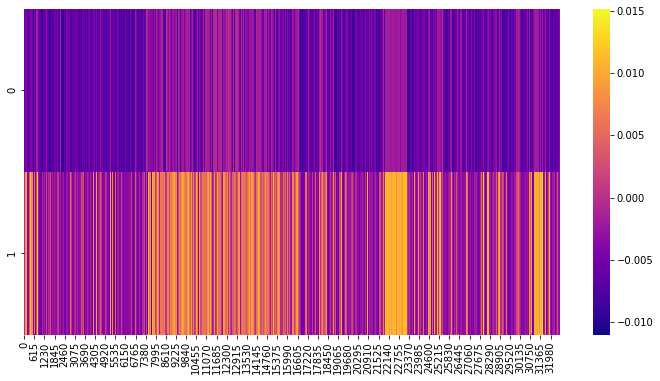

In [23]:
df_comp_5 = pd.DataFrame(pca.components_)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp_5, cmap='plasma')

## T-SNE for the Dataset

In [24]:
tsne = TSNE(n_components=2, perplexity=35, learning_rate=250)

In [25]:
pca.explained_variance_ratio_

array([0.303319  , 0.07258581])

Text(0, 0.5, 'TSNE 2D-Two')

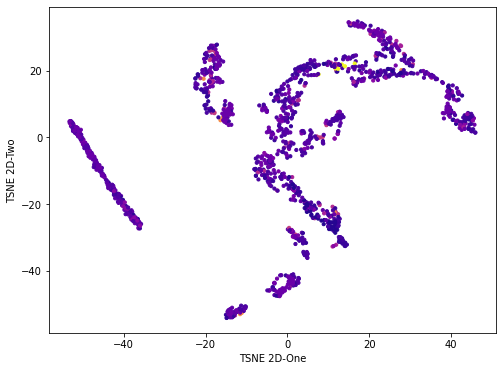

In [27]:
pca_df = pd.DataFrame(x_pca)
tsne_results = tsne.fit_transform(pca_df)

plt.figure(figsize=(8,6))
plt.scatter(tsne_results[:,0], tsne_results[:,1],c=AGE_DF['age'], cmap = 'plasma', s = 10)
plt.xlabel('TSNE 2D-One')
plt.ylabel('TSNE 2D-Two')

## Batch Effect Removal with PyCombat

/Users/swolegorrilla/app-gene-appyter/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/swolegorrilla/app-gene-appyter/venv/lib/python3.7/site-packages/numpy/core/_methods.py:224: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/swolegorrilla/app-gene-appyter/venv/lib/python3.7/site-packages/pycombat/pycombat.py:156: RuntimeWarning: invalid value encountered in true_divide
  change = max((abs(gam_post - gam_prior) / gam_prior).max(),
/Users/swolegorrilla/app-gene-appyter/venv/lib/python3.7/site-packages/pycombat/pycombat.py:157: RuntimeWarning: divide by zero encountered in true_divide
  (abs(del_sq_post - del_sq_prior) / del_sq_prior).max())


Text(0, 0.5, 'Batch Effect Removal')

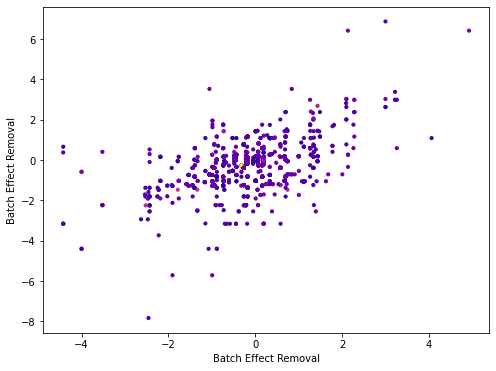

In [32]:
combat = Combat()
c_dat = combat.fit_transform(data_trans[:,:32543],data_trans[:,32543])

plt.figure(figsize=(8,6))
plt.scatter(c_dat[:,0], c_dat[:,1],c=AGE_DF['age'], cmap = 'plasma', s = 10)
plt.xlabel('Batch Effect Removal')
plt.ylabel('Batch Effect Removal')
plt.title('Batch Effect Removed Data for Mouse Age Data')

## UMAP Plot

Text(0, 0.5, 'UMAP Second Component')

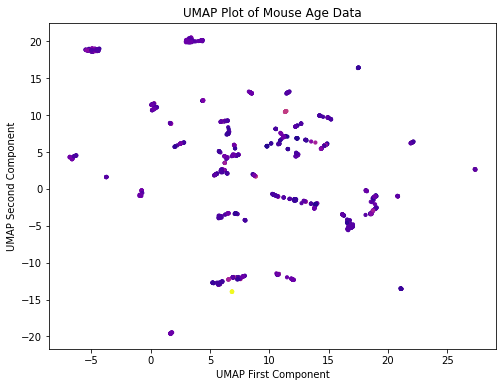

In [43]:
reducer = umap.UMAP()

embedding = reducer.fit_transform(data_trans)

plt.figure(figsize=(8,6))
plt.scatter(embedding[:,0], embedding[:,1],c=AGE_DF['age'], cmap = 'plasma', s = 10)
plt.title('UMAP Plot of Mouse Age Data')
plt.xlabel('UMAP First Component')
plt.ylabel('UMAP Second Component')